In [2]:
import pandas as pd
import missingno as msno
from sklearn.impute import KNNImputer

In [3]:
environment_df = pd.read_csv('environment_df.csv')
imputer = KNNImputer(n_neighbors=10)

In [4]:
environment_df_num = environment_df.select_dtypes(include='float')

<Axes: >

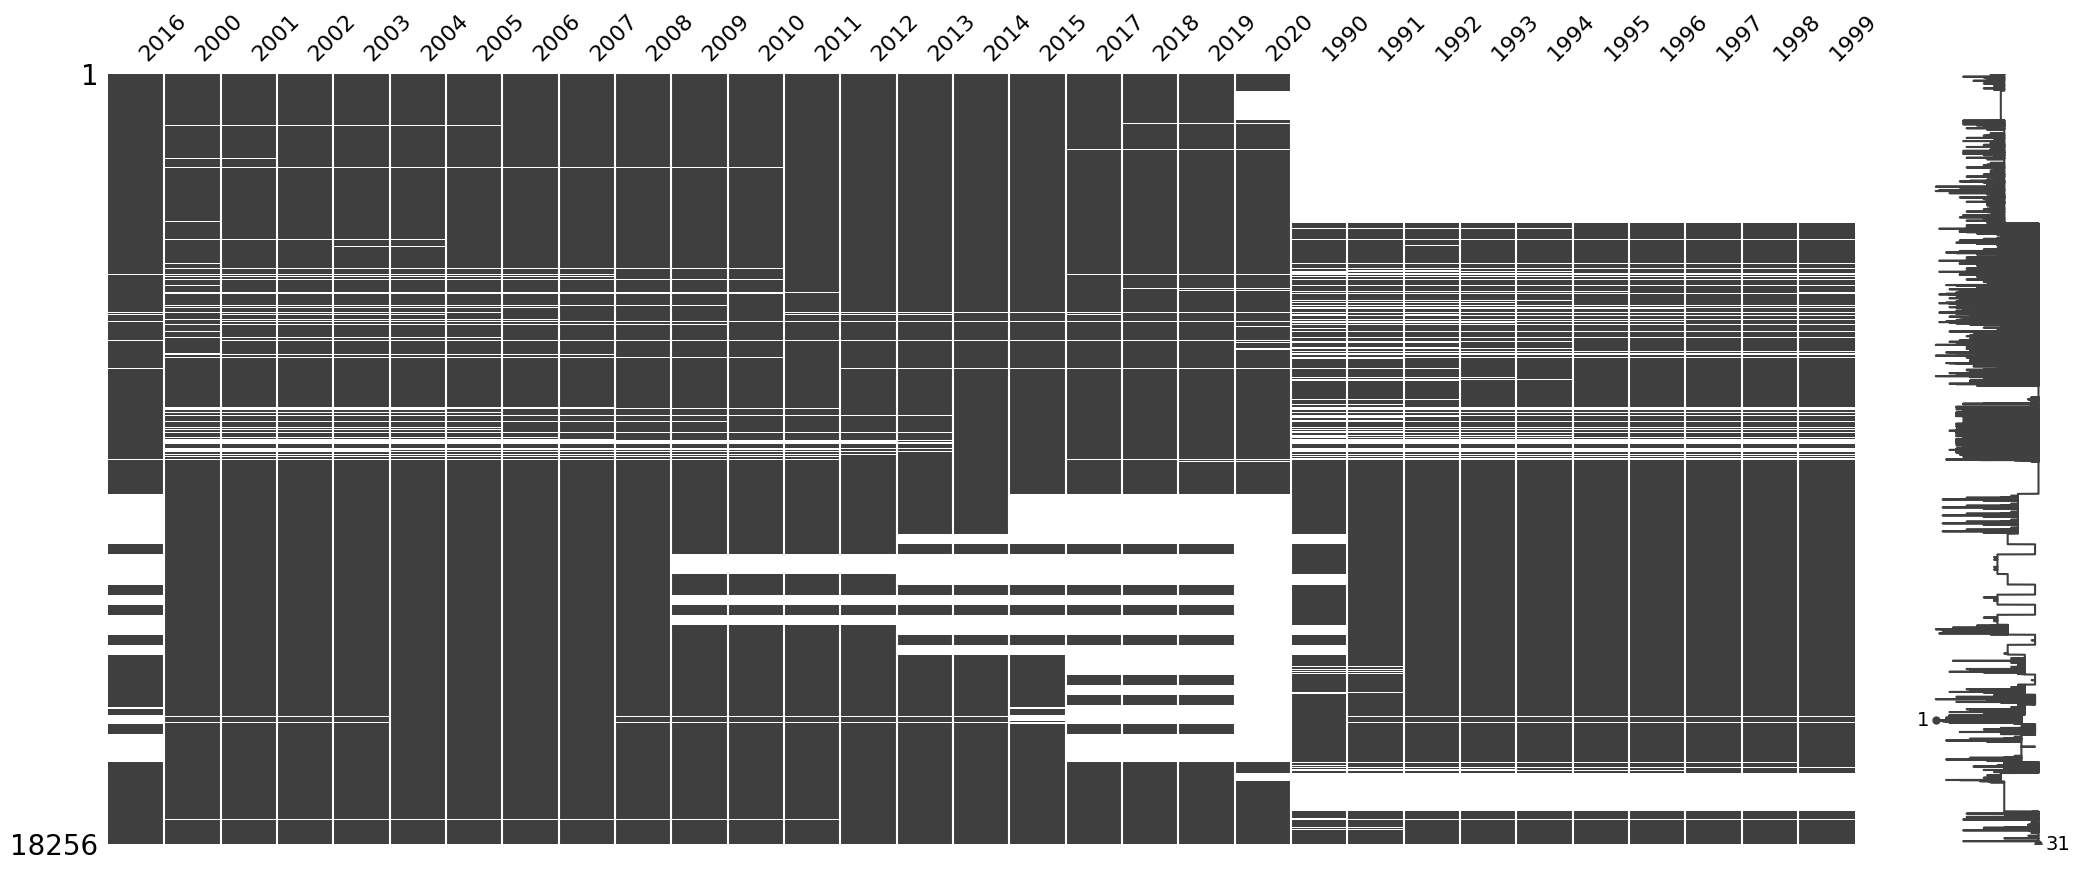

In [5]:
msno.matrix(environment_df_num)

In [6]:
environment_df_impute = imputer.fit_transform(environment_df_num)


In [7]:
full_df = pd.DataFrame()
test = environment_df.select_dtypes(exclude='float')

full_df = pd.concat([full_df, test])

In [8]:
full_df

,Indicator_name,Country_name
0,People using safely managed sanitation service...,1A
1,People using safely managed sanitation service...,1W
2,People using safely managed sanitation service...,4E
3,People using safely managed sanitation service...,7E
4,People using safely managed sanitation service...,8S
...,...,...
18251,Agricultural land (% of land area),ZJ
18252,Agricultural land (% of land area),ZM
18253,Agricultural land (% of land area),ZQ
18254,Agricultural land (% of land area),ZT


In [9]:
def n_knn(n, df):
    num_df = df.select_dtypes(include='float')
    non_num_df = df.select_dtypes(exclude='float')
    full_df = pd.DataFrame()
    
    for z,i in enumerate(n):
        imputer = KNNImputer(n_neighbors=i)
        df_impute = imputer.fit_transform(num_df)
        df_impute = pd.DataFrame(df_impute, columns = num_df.columns).join(non_num_df)
        df_impute['impute_batch'] = z
        full_df = pd.concat([full_df, df_impute])
        print(f'\rImputation number : {z}.', end='')
    return full_df

In [10]:
environment_df_impute_10 = n_knn([8,9,10,11,12], environment_df)

Imputation number : 4.

In [6]:
environment_df_impute = pd.DataFrame(environment_df_impute, columns = environment_df_num.columns)


In [7]:
environment_df_impute = environment_df_impute.join(environment_df.select_dtypes(exclude='float'))

<Axes: >

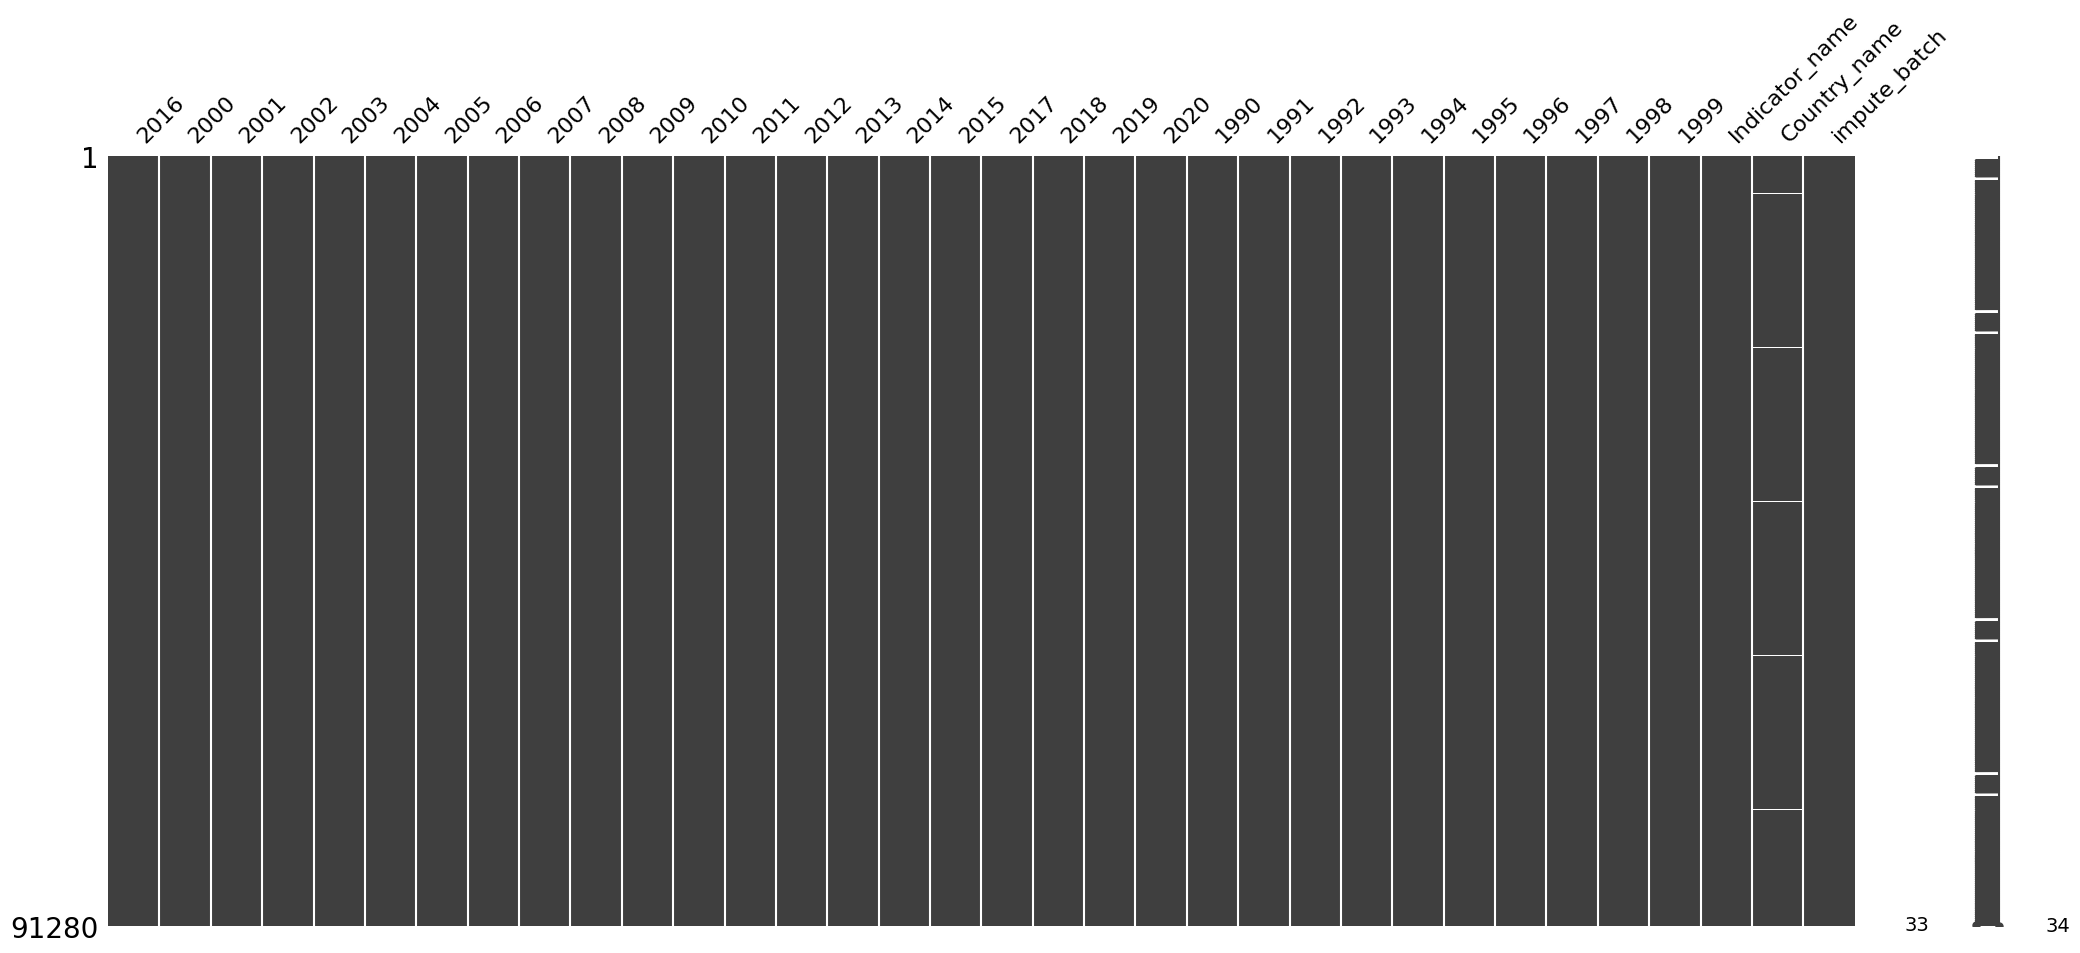

In [11]:
msno.matrix(environment_df_impute_10)

In [12]:
environment_df_impute_10.to_csv('environment_df_impute.csv', index = False)

In [20]:
environment_df_impute_10

,2016,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,1993,1994,1995,1996,1997,1998,1999,Indicator_name,Country_name,impute_batch
0,47.863525,38.959307,39.075707,39.747531,40.015288,40.502942,41.002405,41.607238,42.257362,42.921309,...,37.327263,37.648166,41.709716,42.196357,40.883274,40.123428,40.245761,People using safely managed sanitation service...,1A,0
1,48.631729,28.642005,29.142378,29.747356,30.853638,32.142110,33.256090,34.514853,35.826486,37.166591,...,25.231285,25.393494,25.737379,26.650801,27.494979,27.585806,27.567359,People using safely managed sanitation service...,1W,0
2,55.344539,17.277498,17.678064,18.506988,20.382198,22.389999,24.530333,26.782855,29.182410,31.702598,...,14.274166,17.406529,15.477810,16.952751,20.254178,17.840282,18.916108,People using safely managed sanitation service...,4E,0
3,62.969775,52.482619,52.683847,53.050423,53.414094,53.914706,54.418201,54.883675,55.378876,55.865640,...,61.396585,57.203295,56.172589,55.184553,53.924373,53.282548,52.420002,People using safely managed sanitation service...,7E,0
4,37.521299,9.061379,10.177560,11.390624,13.140922,15.291810,17.078682,18.861558,20.707411,22.557746,...,7.209572,9.554680,7.291304,8.881177,10.475819,6.799899,10.239770,People using safely managed sanitation service...,8S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18251,32.915836,33.657825,33.531828,33.566604,33.579483,33.646013,33.703499,33.686229,33.759644,33.498615,...,33.572593,33.511511,33.462566,33.499426,33.543505,33.656879,33.689243,Agricultural land (% of land area),ZJ,4
18252,32.063923,30.264061,30.340736,30.422793,30.816933,30.800791,30.619190,31.003914,30.917822,31.056377,...,28.520696,28.885242,28.865064,29.412556,29.555146,29.627786,30.138958,Agricultural land (% of land area),ZM,4
18253,33.291786,34.525884,34.608004,34.681599,34.742987,34.818066,33.373024,33.359452,33.397451,33.183341,...,30.773961,31.445199,32.075983,32.738043,33.277445,34.095501,34.615878,Agricultural land (% of land area),ZQ,4
18254,37.062937,37.206242,37.240596,37.270390,37.198447,37.206817,37.116153,37.140532,37.192355,37.176973,...,36.772919,36.860056,36.844470,36.878256,37.068198,37.118033,37.194183,Agricultural land (% of land area),ZT,4
